# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

(Please insert the background here )

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [83]:
import requests

url_get = requests.get('https://www.exchange-rates.org/history/IDR/USD/T')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [84]:
url_get.content[1:500]

b'\n<!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n    <html class="no-js ie8 oldie" lang=\'en\' xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--> <html class="no-js" lang=\'en\' xml:lang=\'en\'> <!--<![endif]-->\r\n<head><title>Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates</title>\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta content="C#" name="CODE_LANGUAGE" />\n<meta content="JavaScript" name="vs_defaultClientScript" />\n<meta content="http://schemas.microsoft.com/intellis'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [85]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [86]:
table = soup.find('table',attrs={'class':'table table-striped table-hover table-hover-solid-row table-simple history-data'})
print(table.prettify()[1:500])

table class="table table-striped table-hover table-hover-solid-row table-simple history-data">
 <tbody>
  <tr>
   <td>
    7/9/2021
   </td>
   <td>
    Friday
   </td>
   <td>
    <a href="/Rate/USD/IDR/7-9-2021">
     14,499.31330
    </a>
    IDR
   </td>
   <td class="text-narrow-screen-hidden">
    <a href="/Rate/USD/IDR/7-9-2021">
     USD IDR rate for 7/9/2021
    </a>
   </td>
  </tr>
  <tr>
   <td>
    7/8/2021
   </td>
   <td>
    Thursday
   </td>
   <td>
    <a href="/Rate/USD/IDR/7


Finding row length.

In [87]:
ex_rate = table.find_all('tr', attrs={'class':''})
row_length = len(ex_rate)
row_length

130

In [88]:
ex_rate[0]


<tr><td>7/9/2021</td><td>Friday</td><td><a href="/Rate/USD/IDR/7-9-2021">14,499.31330</a> IDR</td><td class="text-narrow-screen-hidden"><a href="/Rate/USD/IDR/7-9-2021">USD IDR rate for 7/9/2021</a></td></tr>

In [89]:
print(table.find_all('td', attrs={'class':""})[0].text)
print(table.find_all('td', attrs={'class':""})[1].text)
print(table.find_all('td', attrs={'class':""})[2].text)
print(table.find_all('td', attrs={'class':""})[3].text)
print(table.find_all('td', attrs={'class':""})[4].text)
print(table.find_all('td', attrs={'class':""})[5].text)


7/9/2021
Friday
14,499.31330 IDR
7/8/2021
Thursday
14,515.87714 IDR


Do the scrapping process here (please change this markdown with your explanation)

In [90]:
temp = [] #initiating a tuple

for i in range(0, row_length):

    #scrapping process
    #get data
    #rdate = table.find_all('tr')[i]
    date = ex_rate[i].find_all('td', attrs={'class':''})[0].text
    date = date.strip('\n')
    rate = ex_rate[i].find_all('td', attrs={'class':''})[2].text
    rate = rate.strip('IDR')
    temp.append((date,rate))
temp 

[('7/9/2021', '14,499.31330 '),
 ('7/8/2021', '14,515.87714 '),
 ('7/7/2021', '14,503.93654 '),
 ('7/6/2021', '14,469.58258 '),
 ('7/5/2021', '14,493.33968 '),
 ('7/2/2021', '14,497.65100 '),
 ('7/1/2021', '13,270.37815 '),
 ('6/30/2021', '14,491.89811 '),
 ('6/29/2021', '13,215.84052 '),
 ('6/28/2021', '14,439.22236 '),
 ('6/25/2021', '14,426.82283 '),
 ('6/24/2021', '14,436.21247 '),
 ('6/23/2021', '14,440.32729 '),
 ('6/22/2021', '14,396.08712 '),
 ('6/21/2021', '14,426.42481 '),
 ('6/18/2021', '14,440.13691 '),
 ('6/17/2021', '14,383.75138 '),
 ('6/16/2021', '14,376.12040 '),
 ('6/15/2021', '14,205.14512 '),
 ('6/14/2021', '14,205.68458 '),
 ('6/11/2021', '14,241.97728 '),
 ('6/10/2021', '14,262.89225 '),
 ('6/9/2021', '14,258.61758 '),
 ('6/8/2021', '14,256.29978 '),
 ('6/7/2021', '14,222.58206 '),
 ('6/4/2021', '14,227.49966 '),
 ('6/3/2021', '14,353.54834 '),
 ('6/2/2021', '14,276.29774 '),
 ('6/1/2021', '14,274.83728 '),
 ('5/31/2021', '14,238.06947 '),
 ('5/28/2021', '14,283.5

In [91]:
temp = temp[::-1]
temp[:10]

[('1/11/2021', '14,137.24151 '),
 ('1/12/2021', '14,074.81444 '),
 ('1/13/2021', '14,125.90174 '),
 ('1/14/2021', '14,070.58746 '),
 ('1/15/2021', '14,153.46654 '),
 ('1/18/2021', '14,055.43768 '),
 ('1/19/2021', '14,063.60877 '),
 ('1/20/2021', '14,021.43046 '),
 ('1/21/2021', '13,964.91920 '),
 ('1/22/2021', '14,025.60268 ')]

## Creating data frame & Data wrangling

Put the array into dataframe

In [92]:
import pandas as pd
import numpy as np
df = pd.DataFrame(temp, columns =('date','rate'))
df.head()

,date,rate
0,1/11/2021,"14,137.24151"
1,1/12/2021,"14,074.81444"
2,1/13/2021,"14,125.90174"
3,1/14/2021,"14,070.58746"
4,1/15/2021,"14,153.46654"


Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

In [93]:
df.dtypes

date    object
rate    object
dtype: object

In [94]:
df['date'] =pd.to_datetime(df['date'],dayfirst=True)

In [95]:
df['rate']=df['rate'].replace(',','',regex=True).astype('float64').round()
df.dtypes

date    datetime64[ns]
rate           float64
dtype: object

In [96]:
df.isna().sum()

date    0
rate    0
dtype: int64

In [97]:
df.head()

,date,rate
0,2021-11-01,14137.0
1,2021-12-01,14075.0
2,2021-01-13,14126.0
3,2021-01-14,14071.0
4,2021-01-15,14153.0


In [99]:
import matplotlib.pyplot as plt

In [101]:
df = df.set_index(['date'])

In [102]:
df.describe()

,rate
count,130.000000
mean,14274.338462
std,223.512015
min,13216.000000
25%,14119.250000
50%,14315.500000
75%,14434.750000
max,14607.000000


Data visualisation (please change this markdown with your explanation of what you do for data wrangling)

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

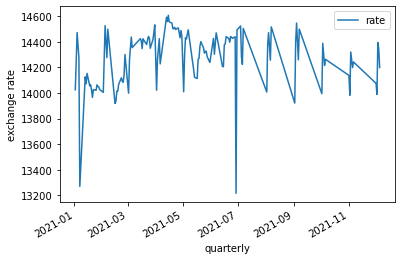

In [103]:
df.plot()
plt.xlabel('quarterly')
plt.ylabel('exchange rate')
plt.show()

Goals of this project is to visualize USD IDR exchange rate in 2021 period. it was meant to see in daily, but unfortunately i accidently changed it into quarterly, and i couldn't change it back into daily in x axis. however, this graph shows the volatility of USD IDR exchange rate, where it has higher price at Rp14.607,- along 2021 and the lowest is Rp. 13.216,-. The highest price is around Q2 period, where exponentially increased in the middle of Q1. in July the exchange rate drop sharply reach its lowest price, and rose again into 14.000 level. 

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.